In [498]:
# Importing the libraries for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [499]:
# Loading the dataset 
dataset=pd.read_csv('mushrooms.csv')

In [500]:
# Gathering information about the null values and dtypes of variables
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [501]:
# Counting duplicated rows
dataset.duplicated().sum()

0

In [502]:
# Examining basic descriptive statistics data
dataset.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [514]:
# Dropping 'veil-type' column, because it has just one uniqe value
dataset=dataset.drop('veil-type',axis=1)

KeyError: "['veil-type'] not found in axis"

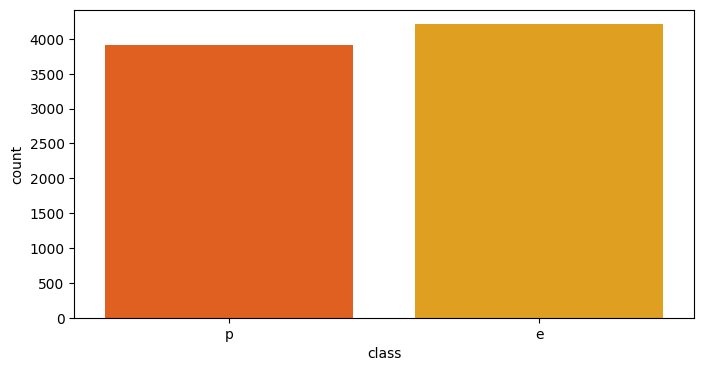

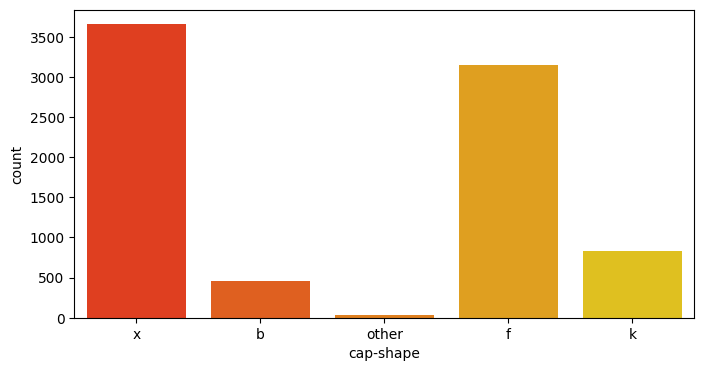

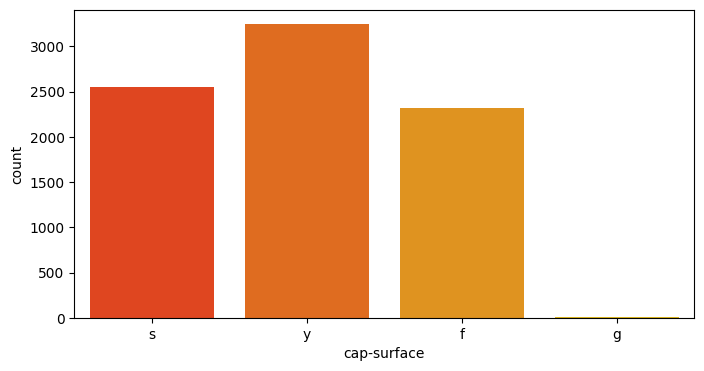

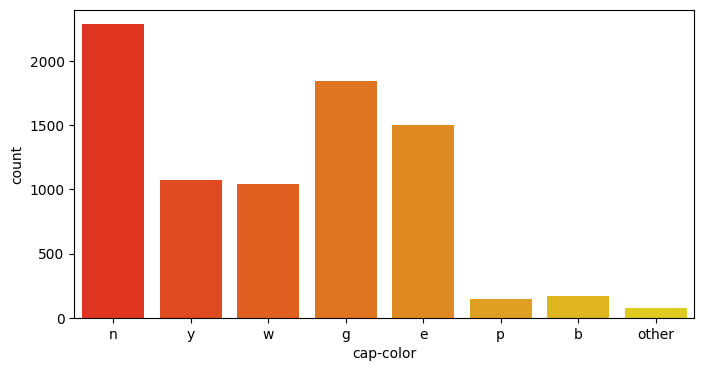

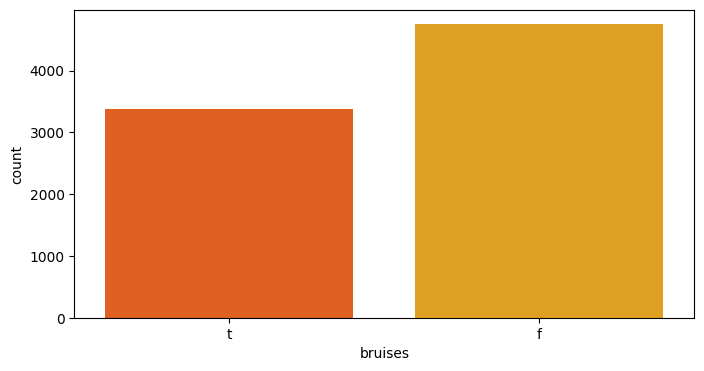

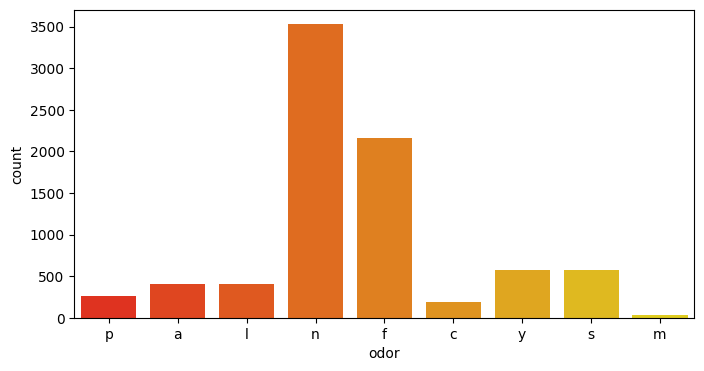

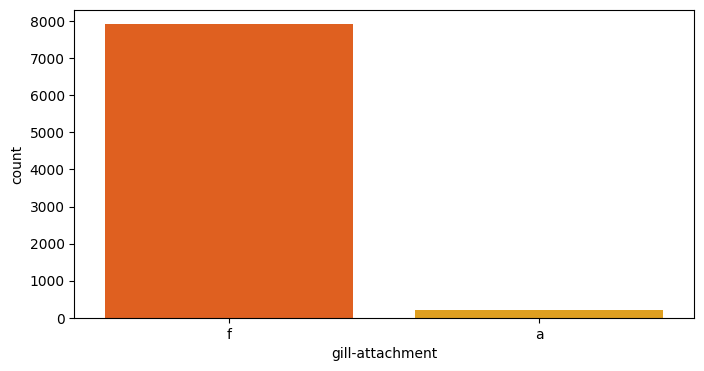

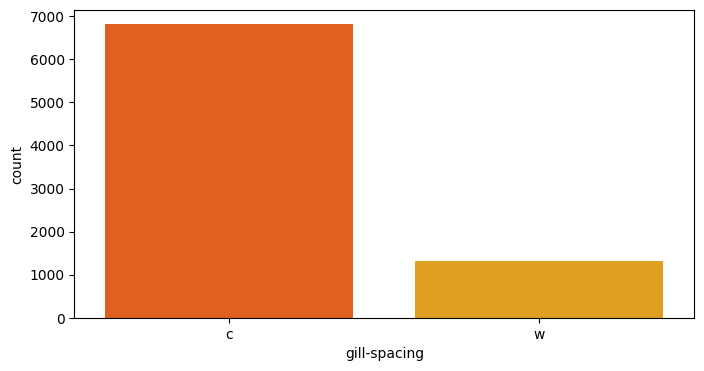

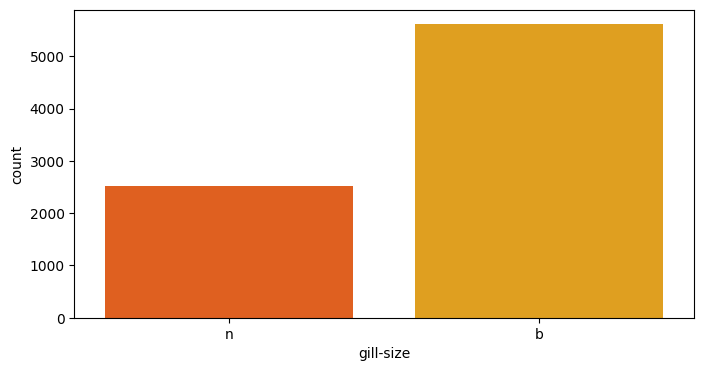

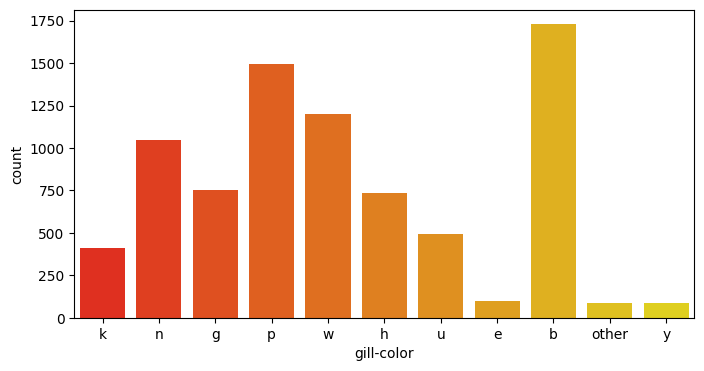

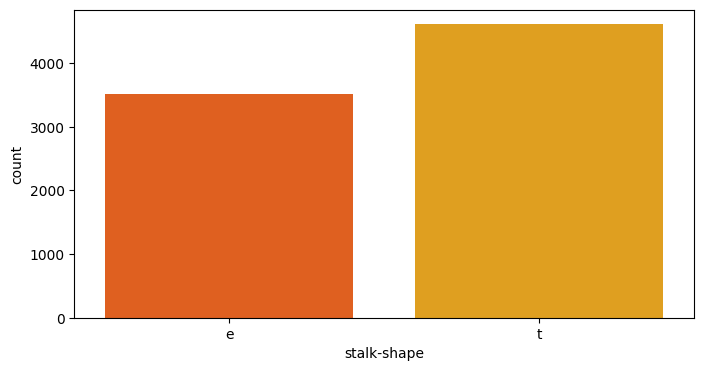

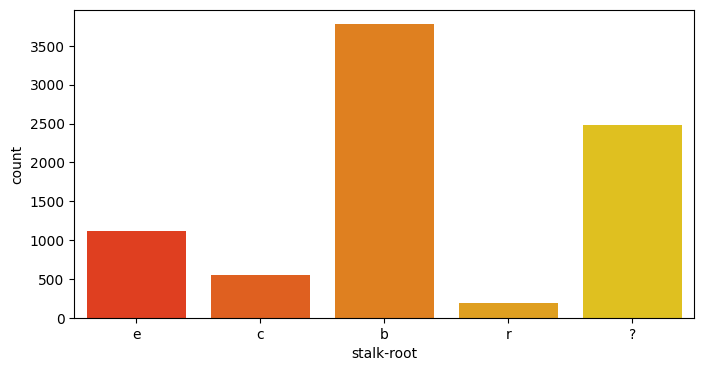

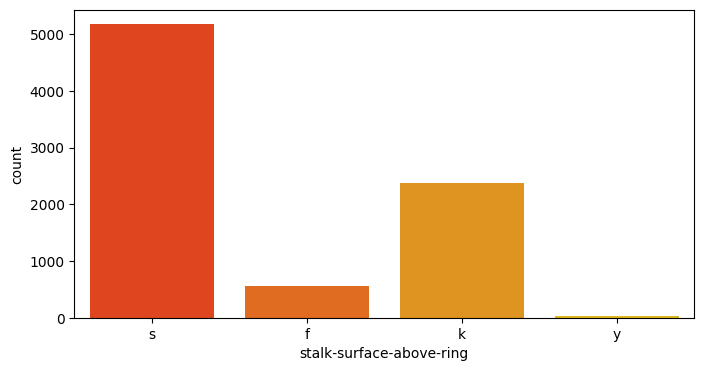

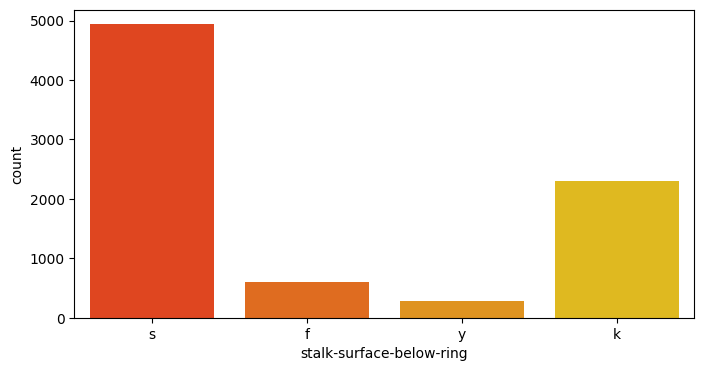

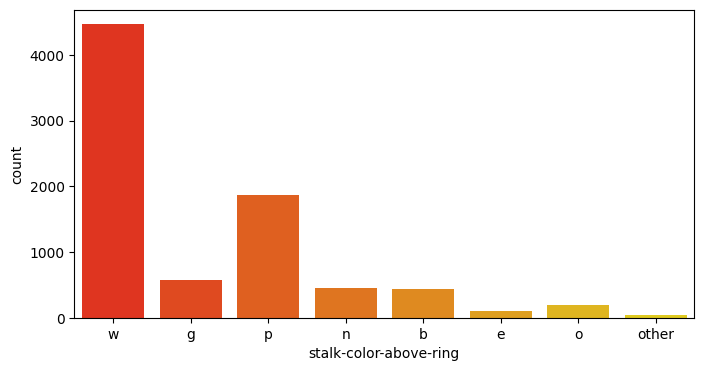

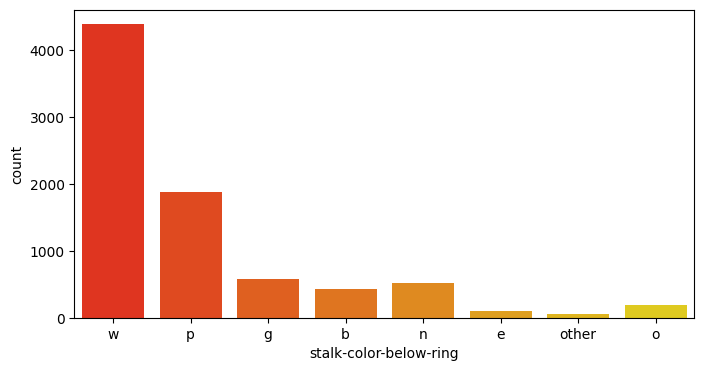

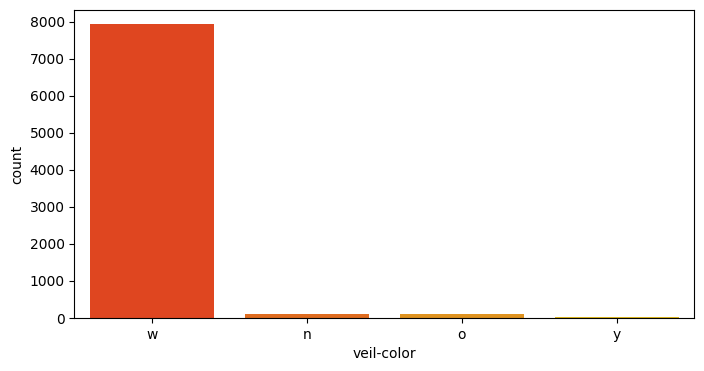

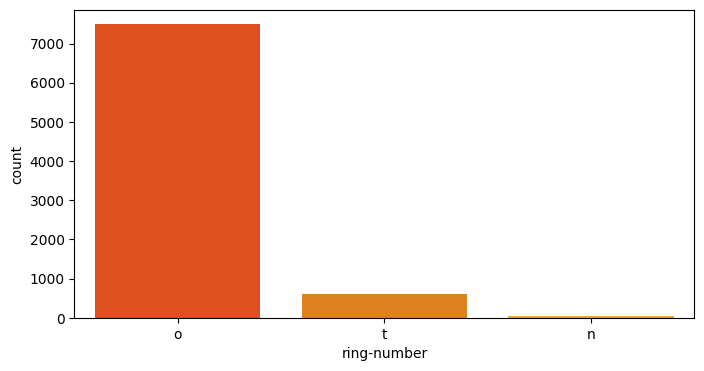

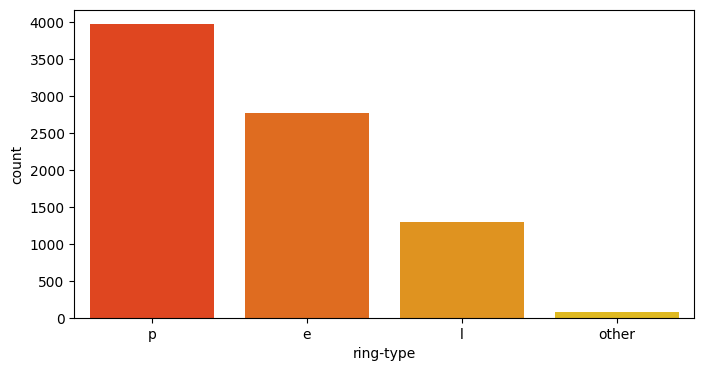

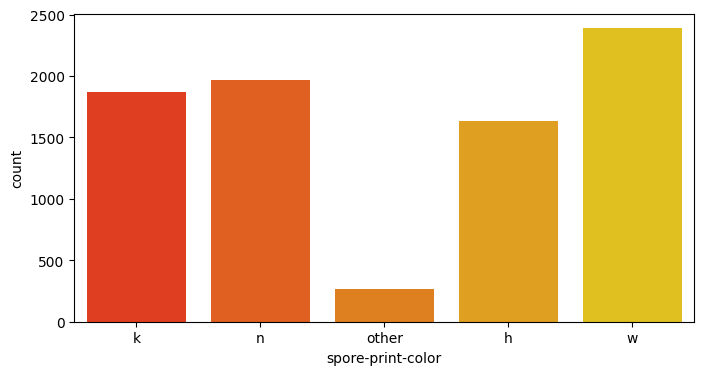

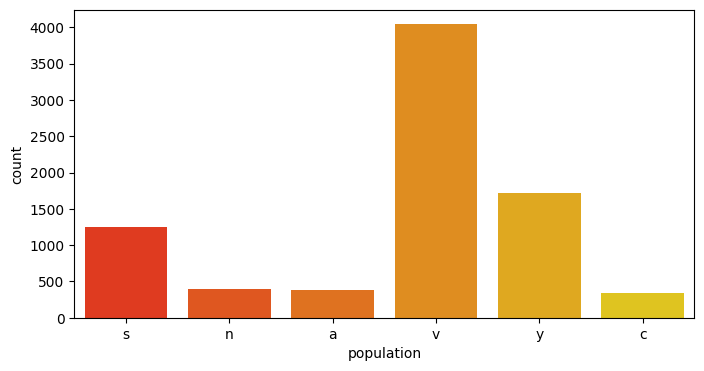

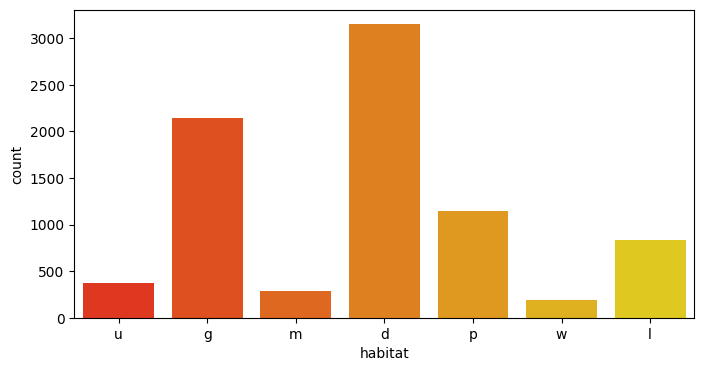

In [515]:
# Examining categorical data distribution and its relation to target variable
cats=list(dataset.columns)
for n in cats:
    plt.figure(figsize=(8,4))
    sns.countplot(data=dataset,x=n,palette='autumn')
    plt.show()

In [505]:
# Mapping rare categories
class RareCatGroup():
    def __init__(self,dataset,target_variable,amount_of_obs):
        self.name_list=[]   
        self.dict_list=[]
        self.am=amount_of_obs
        self.dataset=dataset
        self.cats=list(self.dataset.columns)
        self.cats.remove(target_variable)
    def make_dict(self):
        for n in self.cats:
            val_count=self.dataset[n].value_counts()
            d={}
            if len(val_count[val_count<self.am].index)>1:
                self.name_list.append(val_count[val_count<self.am].name)
                s=list(pd.Series(val_count[val_count<self.am].index))
                for m in range(0,len(s)):
                    d[s[m]]='other'
                self.dict_list.append(d)
        return [self.dict_list,self.name_list]
    def map_cats(self):
        l=self.make_dict()
        dict_list=l[0]
        name_list=l[1]
        print(f'These columns have been altered: {name_list}')
        for n in range(0,len(dict_list)):
            self.dataset[self.name_list[n]]=self.dataset[self.name_list[n]].map(dict_list[n]).fillna(self.dataset[self.name_list[n]])
        return self.dataset
cat_mapper=RareCatGroup(dataset,'class',81)
dataset=cat_mapper.map_cats()


These columns will be altered: ['cap-shape', 'cap-color', 'gill-color', 'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type', 'spore-print-color']


In [507]:
# Splitting the dataset into features and dependent variable dataframes
X=dataset.drop('class',axis=1)
y=dataset['class'].map({'p':0,'e':1})
cats.remove('class')

In [508]:
# Performing the train/test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

In [509]:
# Because the whole dataset consists only of categorical variables, CatBoost classifier is the perfect solution for this problem.
from catboost import CatBoostClassifier,metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [513]:
# CatBoost (optimized for accuracy and training time)
cb=CatBoostClassifier(custom_loss=[metrics.Accuracy()],iterations=100,verbose=False)
cb.fit(X_train, y_train,cat_features=cats,eval_set=(X_test, y_test))
y_pred=cb.predict(X_test)
print(f'{accuracy_score(y_test,y_pred)*100}%\n{confusion_matrix(y_test,y_pred)}')

100.0%
[[1256    0]
 [   0 1425]]
